In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import os

# plt.style.use("seaborn-bright")
plt.rcParams["figure.figsize"] = (24, 13)

In [23]:
csvs = [f for f in os.listdir("results") if f[-4:] == ".csv"]
dfs = [pd.read_csv(os.path.join("results", csv)).rename(columns={"Unnamed: 0": "Epoch"}).set_index("Epoch") for csv in csvs]
print("List of all results:")
print("\n".join(csvs))

List of all results:
history_batch_norm_after_sampled.csv
history_batch_norm_sampled.csv
history_conv_basic.csv
history_conv_basic3_sampled.csv
history_invert_conv_sampled.csv
history_mini_convnet2_sampled.csv
history_mini_convnet4_sampled.csv
history_mini_convnet_sampled.csv


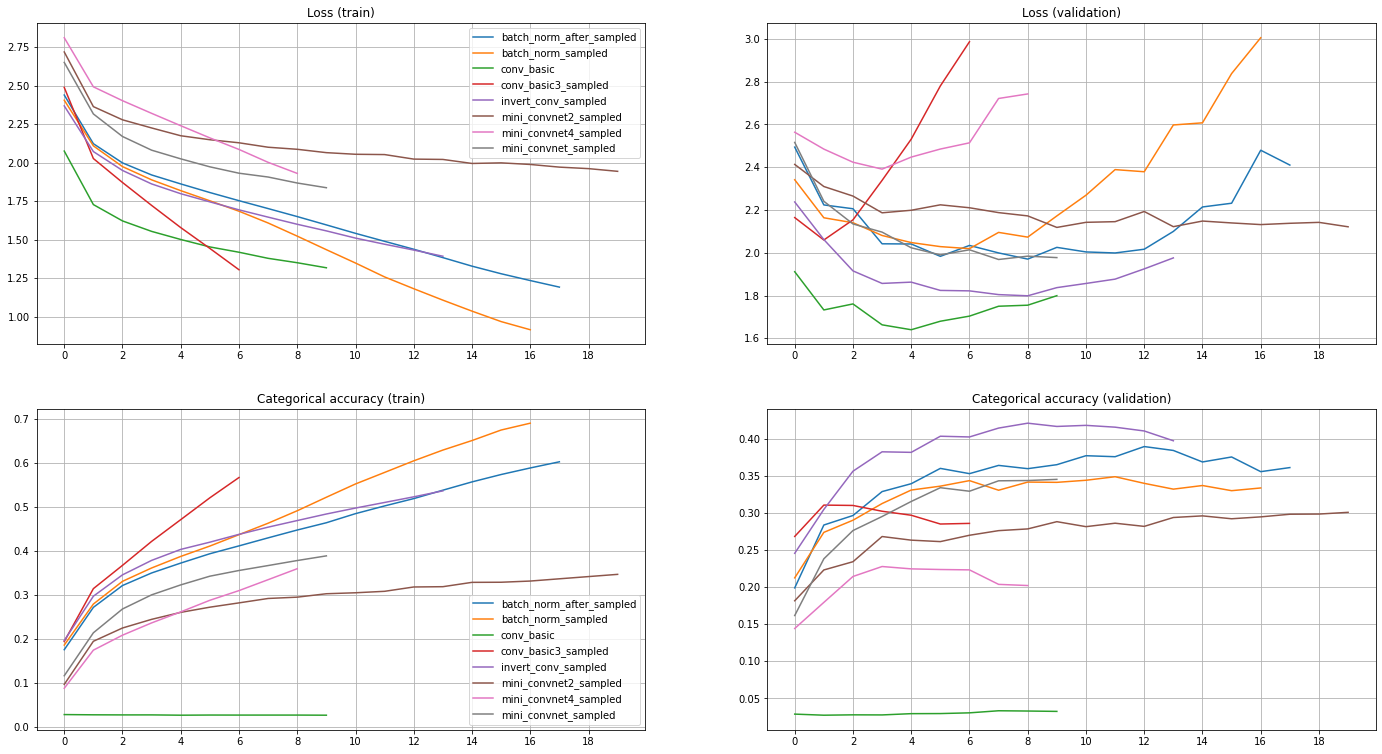

In [27]:
fig, axs = plt.subplots(2,2)
model_names = tuple(map(lambda x: x.split("_", 1)[-1].split(".")[0], csvs))
metrics = ("loss", "val_loss", "categorical_accuracy", "val_categorical_accuracy")
metrics_names = ("Loss (train)", "Loss (validation)", "Categorical accuracy (train)", "Categorical accuracy (validation)")

i=0
for ax, metric, metric_name in zip(axs.flatten(), metrics, metrics_names):
    locator = matplotlib.ticker.MultipleLocator(2)
    formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
    for df, model_name in zip(dfs, model_names):
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.plot(df[metric])
    ax.set_title(metric_name)
    ax.legend(model_names).set_visible(i in [0, 2])
    ax.grid()
    i += 1
plt.show()